<a href="https://colab.research.google.com/github/akshay659/DL.-Spam-and-Ham/blob/main/DL_Spam_and_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection (1)


In [ ]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import scipy




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_table("/content/SMSSpamCollection",names=['label','message'])

In [ ]:

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
le = LabelEncoder()

In [ ]:
df['label'] = le.fit_transform(df['label'])

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


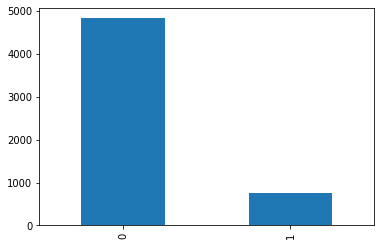

In [ ]:
df['label'].value_counts().plot(kind = "bar")

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## Datacleaning

stops = set(stopwords.words("english"))
def data_cleaning(sent):
  sent = sent.lower()    # Make all letter small
  sentence = re.sub('[^a-z]',' ',sent)   #' ' replace anything apart from a-z with the space.
  words = sentence.split()
  imp_words = [w for w in words if w not in stops]


  return (' '.join(imp_words))

In [ ]:
df["clean_text"] = df['message'].apply(lambda x : data_cleaning(x))

In [ ]:
df.head()

,label,message,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [ ]:
df.drop('clean_text', axis =1,inplace=True )

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
x = df['label']

In [ ]:
y= df['message']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=40,test_size=0.2)

In [ ]:
#Performing Vectorizer

tfd = TfidfVectorizer()

In [ ]:
x_train =tfd.fit_transform(x_train)
x_test =tfd.transform(x_test)

AttributeError: ignored

In [ ]:
print(x_train)

In [ ]:
x_train.shape

In [ ]:
x_train = scipy.sparse.csr_matrix.todense(x_train)
x_test = scipy.sparse.csr_matrix.todense(x_test)